# HMM Example
UCS749: Conversational AI: Speech Processing and Synthesis  
CSED TIET

## Initialise

In [ ]:
!ls

sample_data


In [ ]:
from IPython.display import Audio
from scipy.io.wavfile import read as wavRead
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
%matplotlib inline

## Download Data & Validate

From [Free Spoken Digit Dataset (10 digits x 6 speakers x 50 repeats) [Github]](https://github.com/Jakobovski/free-spoken-digit-dataset)

In [ ]:
!git clone https://github.com/Jakobovski/free-spoken-digit-dataset

Cloning into 'free-spoken-digit-dataset'...
remote: Enumerating objects: 4260, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 4260 (delta 25), reused 8 (delta 8), pack-reused 4212
Receiving objects: 100% (4260/4260), 30.38 MiB | 19.09 MiB/s, done.
Resolving deltas: 100% (129/129), done.


Check if the clone was successful and the data is in sub-folder `recordings`

In [ ]:
!ls free-spoken-digit-dataset/recordings | wc -l

3000


In [ ]:
RNAMES=!find free-spoken-digit-dataset/recordings | shuf | head -5
RNAMES

['free-spoken-digit-dataset/recordings/7_george_37.wav',
 'free-spoken-digit-dataset/recordings/2_lucas_39.wav',
 'free-spoken-digit-dataset/recordings/7_lucas_49.wav',
 'free-spoken-digit-dataset/recordings/8_yweweler_14.wav',
 'free-spoken-digit-dataset/recordings/0_lucas_15.wav']

32768

In [ ]:
_i=0
fname = RNAMES[_i]
label = int(Path(fname).stem.split('_')[0])
sr, y = wavRead(fname)
print(f'Filename: {fname}')
print (f'Label: {label:02d}')
print(f'sampling rate: {sr}')
print (f'speaker 1 audio shape: {y.shape}')
Audio(y, rate=sr)

Filename: free-spoken-digit-dataset/recordings/7_george_37.wav
Label: 07
sampling rate: 8000
speaker 1 audio shape: (2673,)


In [ ]:
_i=1
fname = RNAMES[_i]
label = int(Path(fname).stem.split('_')[0])
sr, y = wavRead(fname)
print(f'Filename: {fname}')
print (f'Label: {label:02d}')
print(f'sampling rate: {sr}')
print (f'speaker 1 audio shape: {y.shape}')
Audio(y, rate=sr)

Filename: free-spoken-digit-dataset/recordings/2_lucas_39.wav
Label: 02
sampling rate: 8000
speaker 1 audio shape: (3005,)


In [ ]:
_i=2
fname = RNAMES[_i]
label = int(Path(fname).stem.split('_')[0])
sr, y = wavRead(fname)
print(f'Filename: {fname}')
print (f'Label: {label:02d}')
print(f'sampling rate: {sr}')
print (f'speaker 1 audio shape: {y.shape}')
Audio(y, rate=sr)

Filename: free-spoken-digit-dataset/recordings/7_lucas_49.wav
Label: 07
sampling rate: 8000
speaker 1 audio shape: (3368,)


In [ ]:
_i=3
fname = RNAMES[_i]
label = int(Path(fname).stem.split('_')[0])
sr, y = wavRead(fname)
print(f'Filename: {fname}')
print (f'Label: {label:02d}')
print(f'sampling rate: {sr}')
print (f'speaker 1 audio shape: {y.shape}')
Audio(y, rate=sr)

Filename: free-spoken-digit-dataset/recordings/8_yweweler_14.wav
Label: 08
sampling rate: 8000
speaker 1 audio shape: (2657,)


In [ ]:
_i=4
fname = RNAMES[_i]
label = int(Path(fname).stem.split('_')[0])
sr, y = wavRead(fname)
print(f'Filename: {fname}')
print (f'Label: {label:02d}')
print(f'sampling rate: {sr}')
print (f'speaker 1 audio shape: {y.shape}')
Audio(y, rate=sr)

Filename: free-spoken-digit-dataset/recordings/0_lucas_15.wav
Label: 00
sampling rate: 8000
speaker 1 audio shape: (5019,)


## Extract MFCC Features

In [ ]:
import librosa
import seaborn as sns

def loadAudio(fname, nMfcc=13, nMels=40, nFft=512, hopLength=160, fMin=0, fMax=None) :
  label = int(Path(fname).stem.split('_')[0])
  sr, y = wavRead(fname)
  y = y.astype(np.dtypes.Float32DType) / (1<<(16-1))
  # y, sr = librosa.load(fname, sr=None)
  mfcc = librosa.feature.mfcc(y=y, sr=sr, n_fft=nFft,
                              n_mfcc=nMfcc, n_mels=nMels,
                              hop_length=hopLength,
                              fmin=fMin, fmax=fMax, htk=False)
  return dict(
      mfcc=mfcc,
      sr=sr,
      y=y,
      nMfcc=nMfcc,
      nMels=nMels,
      nFft=nFft,
      hopLength=hopLength,
      fMin=fMin,
      fMax=fMax,
      label=label,
  )

db = {fname: loadAudio(fname) for fname in RNAMES}
{fname: db[fname]['mfcc'].shape for fname in RNAMES}

{'free-spoken-digit-dataset/recordings/5_jackson_2.wav': (13, 23),
 'free-spoken-digit-dataset/recordings/3_george_47.wav': (13, 17),
 'free-spoken-digit-dataset/recordings/8_theo_38.wav': (13, 15),
 'free-spoken-digit-dataset/recordings/8_george_36.wav': (13, 21),
 'free-spoken-digit-dataset/recordings/2_jackson_22.wav': (13, 24)}

MFCCs
Filename: free-spoken-digit-dataset/recordings/5_jackson_2.wav
Sample Rate:8000
Shape: (13, 23)
Label: 5


<Axes: >

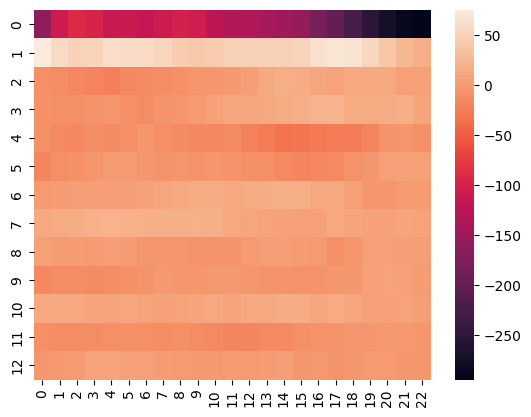

In [ ]:
_i=0
fname = RNAMES[_i]
dbRow = db[fname]
sr=dbRow['sr']
mfcc=dbRow['mfcc']
label=dbRow['label']
print (f'MFCCs')
print (f'Filename: {fname}')
print (f'Sample Rate:{sr}')
print (f'Shape: {mfcc.shape}')
print (f'Label: {label}')
sns.heatmap(mfcc)
# librosa.display.specshow(mfcc, sr=sr, x_axis='time')

MFCCs
Filename: free-spoken-digit-dataset/recordings/3_george_47.wav
Sample Rate:8000
Shape: (13, 17)
Label: 3


<Axes: >

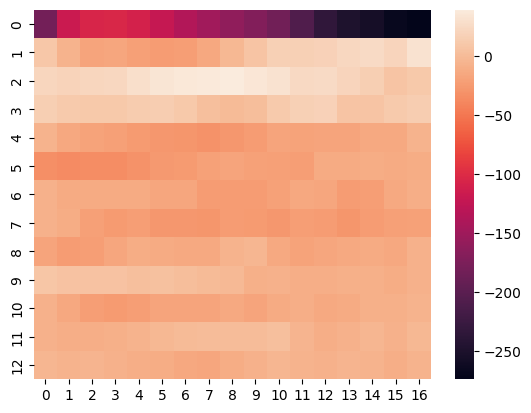

In [ ]:
_i=1
fname = RNAMES[_i]
dbRow = db[fname]
sr=dbRow['sr']
mfcc=dbRow['mfcc']
label=dbRow['label']
print (f'MFCCs')
print (f'Filename: {fname}')
print (f'Sample Rate:{sr}')
print (f'Shape: {mfcc.shape}')
print (f'Label: {label}')
sns.heatmap(mfcc)
# librosa.display.specshow(mfcc, sr=sr, x_axis='time')

MFCCs
Filename: free-spoken-digit-dataset/recordings/8_theo_38.wav
Sample Rate:8000
Shape: (13, 15)
Label: 8


<Axes: >

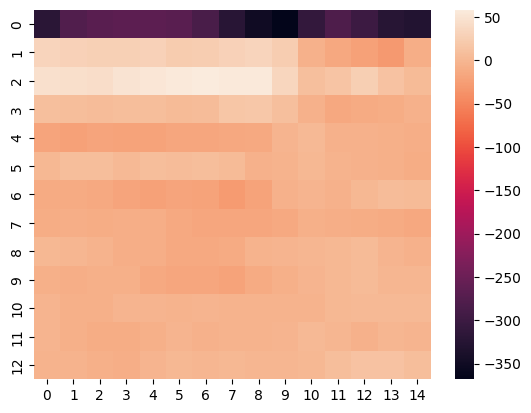

In [ ]:
_i=2
fname = RNAMES[_i]
dbRow = db[fname]
sr=dbRow['sr']
mfcc=dbRow['mfcc']
label=dbRow['label']
print (f'MFCCs')
print (f'Filename: {fname}')
print (f'Sample Rate:{sr}')
print (f'Shape: {mfcc.shape}')
print (f'Label: {label}')
sns.heatmap(mfcc)
# librosa.display.specshow(mfcc, sr=sr, x_axis='time')

MFCCs
Filename: free-spoken-digit-dataset/recordings/8_george_36.wav
Sample Rate:8000
Shape: (13, 21)
Label: 8


<Axes: >

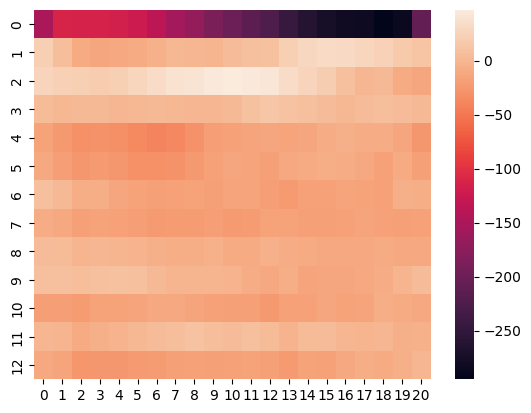

In [ ]:
_i=3
fname = RNAMES[_i]
dbRow = db[fname]
sr=dbRow['sr']
mfcc=dbRow['mfcc']
label=dbRow['label']
print (f'MFCCs')
print (f'Filename: {fname}')
print (f'Sample Rate:{sr}')
print (f'Shape: {mfcc.shape}')
print (f'Label: {label}')
sns.heatmap(mfcc)
# librosa.display.specshow(mfcc, sr=sr, x_axis='time')

MFCCs
Filename: free-spoken-digit-dataset/recordings/2_jackson_22.wav
Sample Rate:8000
Shape: (13, 24)
Label: 2


<Axes: >

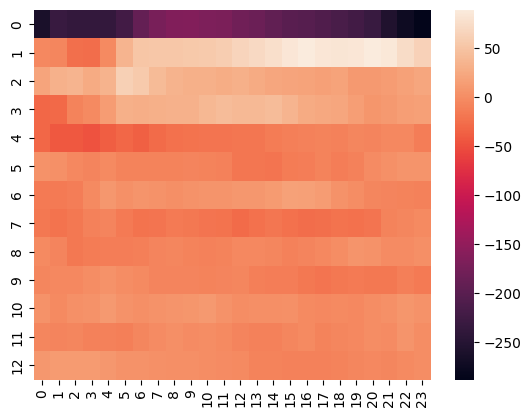

In [ ]:
_i=4
fname = RNAMES[_i]
dbRow = db[fname]
sr=dbRow['sr']
mfcc=dbRow['mfcc']
label=dbRow['label']
print (f'MFCCs')
print (f'Filename: {fname}')
print (f'Sample Rate:{sr}')
print (f'Shape: {mfcc.shape}')
print (f'Label: {label}')
sns.heatmap(mfcc)
# librosa.display.specshow(mfcc, sr=sr, x_axis='time')